# Introduction

In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import KMNIST
from torchvision.transforms import Compose, ToTensor, Lambda
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from PIL import Image

## What is deep learning?

Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher-level features from the raw input.

<img src="../images/AI_ML_DL.png" width="400" /><br />

## Neural networks

Neural network คือ machine learning model ที่เลียนแบบการทำงานของเซลล์สมองของมนุษย์ มีองค์ประกอบคือ <b>artificial neuron</b> ซึ่งมีโครงสร้างดังนี้

<img src="../images/neuron.png" width="400" /><br />

เมื่อส่งข้อมูล input เข้าไปใน neuron ข้อมูลแต่ละ feature จะถูก transformed โดย linear regression จากนั้นนำมารวมกันโดย linear combination แล้วถูก transformed โดย <b>activation function</b> ได้ output ออกมา

Activation function เป็น non-linear function ที่แปลงข้อมูลจนทำให้แบ่งด้วยเส้นตรงได้ หากไม่มี activation function ก็จะทำให้ network เป็นแค่ linear transformation อย่างหนึ่ง

<img src="../images/transform_by_activation.png" width="800" /><br />

Activation function มีหลายชนิด 
- Activation function ที่นิยมที่สุดคือ tanh, sigmoid และ ReLU (Rectified Linear Unit)
- Activation function บางชนิดต้องใช้ค่าจากหลาย neuron เช่น softmax, maxout

<img src="../images/activation.png" width="400" /><br />

Neural network มี 3 ชั้น ได้แก่
- Input layer เป็น layer ที่รับ input เข้าไปใน network
- Hidden layer เป็น neuron layer 1 ชั้นขึ้นไป ทำการแปลงข้อมูล ในแต่ละชั้นมีหลาย neuron ที่มี weight ต่างกัน
- Output layer เป็น layer ที่ให้ output ของ network ออกมา

Neural network อย่างง่ายที่สุดคือ single-layer network (มี hidden layer 1 ชั้น) ดังภาพ

<img src="../images/single_layer_network.png" width="250" /><br />


## Universal approximation theorem

Universal approximation theorem บอกว่า single-layer network จะสามารถประมาณฟังก์ชันตัวแปรเดียวใด ๆ ก็ได้ถ้ามี neuron มากพอ (แต่ไม่สามารถประมาณฟังก์ชันหลายตัวแปรได้) หากต้องการทำให้ network ซับซ้อนขึ้น เราต้องเพิ่ม depth (จำนวน layer)

## Google Colab

<a href="https://colab.research.google.com/">Google Colab</a> เป็น Jupyter notebook ที่ให้บริการโดย Google

เราสามารถเข้าถึงไฟล์ใน Google Drive ของเราด้วยคำสั่งต่อไปนี้

```python
from google.colab import drive
drive.mount('/content/gdrive/')
```

Google Colab ให้บริการ Graphic Processing Unit (GPU) เราสามารถเปลี่ยนจาก CPU เป็น GPU ได้ โดยไปที่ `Runtime` $\rightarrow$ `Change Runtime Type` $\rightarrow$ `Hardware Accelerator` $\rightarrow$ เปลี่ยนจาก CPU เป็น GPU

## PyTorch

### Tensor handling

| Function/Attribute/Method | การทำงาน | Return |
| - | - | - |
| `torch.tensor(<list>)` | สร้าง Tensor จาก list | `torch.Tensor` |
| `torch.from_numpy(<array>)` | สร้าง Tensor จาก numpy array | `torch.Tensor` |
| `<tensor>.shape` | บอกขนาดของ tensor | `torch.Size` |
| `<tensor>.view(<ความยาวในมิติที่1, ความยาวในมิติที่2, ...>)` | reshape tensor ให้มีขนาดตามที่กำหนด | `torch.Tensor` |
| `torch.randn(<tuple_of_int>)` | สร้าง tensor ที่มีค่าของแต่ละสมาชิกถูกสุ่มขึ้นมา | `torch.Tensor` |
| `<tensor>.squeeze()` | เอา dimension ที่มีความยาวเท่ากับ 1 ออก เพื่อให้ tensor มี dimension ลดลง | `torch.Tensor` |
| `<tensor>.unsqueeze(<dim>)` | เพิ่ม dimension ตามที่ระบุ โดยที่ dimension นั้นมีความยาวเท่ากับ 1 | `torch.Tensor` |

- Tensor statistics เช่น `<tensor>.mean()`, `<tensor>.std()`, `<tensor>.max()`, `<tensor>.sum()` ใส่ค่าให้กับ `axis` parameter เพื่อคำนวณตามแกนที่กำหนดเท่านั้น
- Tensor linear algebra ใช้ `torch.linalg` เช่น `torch.linalg.inv(<tensor>)`
- ทำ fast Fourier transform ใช้ `torch.fft` เช่น
    - `torch.fft.fft(<tensor>)` (ทำ 1D transform)
    - `torch.fft.fftn(<tensor>)` (ทำ nD transform)

### Data handling

เราใช้ `torchvision` ในการจัดการข้อมูล มี model, dataset, transformation ให้ใช้มากมาย

#### `torchvision.datasets`

| Function/Attribute/Method | การทำงาน | Return |
| - | - | - |
| `from torchvision.datasets import <dataset>` | นำเข้า dataset ที่มีใน `PyTorch` เช่น `MNIST`, `ImageNet` (นิยมมาก) | - |
| `<train_set> = <dataset>(root=<path>, train=True, download=<bool>, transform=<transforms>, target_transform=<transforms>)`<br />`<test_set> = <dataset>(root=<path>, train=False, download=<bool>, transform=<transforms>, target_transform=<transforms>)` | สร้าง training set กับ test set จาก dataset ที่มีใน `PyTorch` <br />(`root` กำหนด directory ที่จะ save ข้อมูลเอาไว้ <br />ถ้ายังไม่ save ให้กำหนด `download=True` <br />หากต้องการแปลง feature ให้กำหนด `transforms` object ให้กับ `transform` parameter <br />และหากต้องการแปลง target ให้กำหนด `transforms` object ให้กับ `target_transform` parameter)  | - |
| `<data>.data.shape` | บอกขนาดของข้อมูล (หากเป็นภาพจะบอกทั้งจำนวนภาพและขนาดของแต่ละภาพ) | `torch.Size` |
| `<data>.targets.shape` | บอกจำนวนข้อมูล | `torch.Size` |
| `print(<data>)` | แสดงชื่อ จำนวนข้อมูล ตำแหน่งที่เก็บข้อมูล และเป็น train set หรือไม่ | - |
| `type(<data>)` | บอก class ของ dataset | type |
| `dir(<data>)` | แสดง list ของ attributes/methods ของ dataset | list |

#### `torchvision.transforms`

| Function/Attribute/Method | การทำงาน |
| - | - |
| `torchvision.transforms.Compose(<list_of_transformations>)` | รวมทุก transformation ที่อยากทำ (คล้ายกับการสร้าง pipeline) |
| `torchvision.transforms.ToTensor()` | แปลงข้อมูล (เช่น ภาพ) เป็น Tensor |
| `torchvision.transforms.Lambda(<lambda_fxn>)` | แปลง lambda function ที่เราสร้างขึ้นเองเป็น transformation |
| `torchvision.transforms.Normalize(<mean>, <std>)` | normalize ข้อมูล |

#### `torchvision.datasets.ImageFolder`

`torchvision.datasets.ImageFolder` ใช้จัดการ dataset ที่มีโครงสร้างดังนี้

```
root/class_x/xxx.png
root/class_x/xxy.png
root/class_x/[...]/xxz.png

root/class_y/123.png
root/class_y/nsdf3.png
root/class_y/[...]/asd932_.png
```

#### `DataLoader` 

`torch.utils.data.DataLoader()` ใช้แบ่งข้อมูลออกเป็น batch มี parameter ที่สำคัญดังนี้
- `dataset` เป็นข้อมูลที่จะเอามาแบ่งเป็น batch
- `batch_size` เป็นจำนวนข้อมูลในแต่ละ batch
- `num_workers` เป็นจำนวน subprocess ในการโหลดข้อมูล (เท่ากับ 0 by default) ไม่ต้องสนใจก็ได้
- `shuffle` ให้บอกว่าต้องการ shuffle ข้อมูลทุก ๆ epoch หรือไม่ (`True`/`False`) เป็นการป้องกัน training bias

ใช้ `<batch_sample>, <batch_target> = next(iter(<data_loader>))` เพื่อ iterate over the data loader

In [2]:
# Download the KMNIST training and test datasets
train_set = KMNIST(root="../data", train=True, download=True)
test_set = KMNIST(root="../data", train=False, download=True)

100%|████████████████████████████████████████████████████████████████████████████| 18165135/18165135 [00:40<00:00, 444244.72it/s]


Extracting ../data\KMNIST\raw\train-images-idx3-ubyte.gz to ../data\KMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████| 29497/29497 [00:00<00:00, 140670.46it/s]


Extracting ../data\KMNIST\raw\train-labels-idx1-ubyte.gz to ../data\KMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████| 3041136/3041136 [00:08<00:00, 362031.66it/s]


Extracting ../data\KMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\KMNIST\raw



100%|███████████████████████████████████████████████████████████████████████████████████| 5120/5120 [00:00<00:00, 4092783.78it/s]

Extracting ../data\KMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\KMNIST\raw



In [3]:
train_set

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train

In [4]:
type(train_set)

torchvision.datasets.mnist.KMNIST

In [5]:
dir(train_set)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [6]:
# Dictionary of category:index
class_to_idx = train_set.class_to_idx
class_to_idx

{'o': 0,
 'ki': 1,
 'su': 2,
 'tsu': 3,
 'na': 4,
 'ha': 5,
 'ma': 6,
 'ya': 7,
 're': 8,
 'wo': 9}

<class 'PIL.Image.Image'>


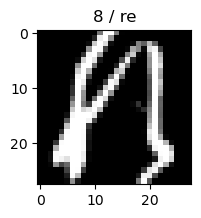

In [7]:
# Show the first image of the training set
image, label = train_set[0]
print(type(image))
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image, cmap='gray')
ax.set_title(f"{label} / {list(class_to_idx)[label]}");

In [8]:
def add_noise(x, alpha=0.1):
    return x + alpha*torch.rand_like(x)

# Combine all transformations
transform = Compose([
    ToTensor(),  # convert images to PyTorch Tensors
    Lambda(lambda x: add_noise(x, 0.5))  # add noise to images
])

# Import and transform the downloaded KMNIST training and test datasets
train_set = KMNIST(root="../data", train=True, download=False, transform=transform, target_transform=None)
test_set = KMNIST(root="../data", train=False, download=False, transform=transform, target_transform=None)

In [9]:
print("min:", train_set.data.min().item())
print("max:", train_set.data.max().item())
print("mean: ", torch.mean(train_set.data/255.).item())
print("std: ", torch.std(train_set.data/255.).item())

min: 0
max: 255
mean:  0.19176216423511505
std:  0.3483428359031677


<class 'torch.Tensor'>
torch.Size([1, 28, 28])


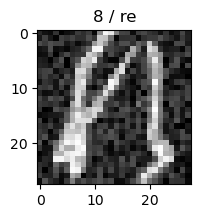

In [10]:
# Show the first image of the new training set
image, label = train_set[0]
print(type(image))
print(image.shape)
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(image[0], cmap='gray')
ax.set_title(f"{label} / {list(class_to_idx)[label]}");

In [11]:
# Initialise a DataLoader object to create batches of the dataset, each of which has 32 images
train_loader = DataLoader(dataset=train_set, batch_size=32, num_workers=0, shuffle=True)

In [12]:
# Iterate over the data loader
train_batch_samples, train_batch_targets = next(iter(train_loader))
print(train_batch_samples.shape)
print(train_batch_targets.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


tensor([4, 3, 0, 0, 9, 5, 5, 2, 0, 0, 9, 4, 4, 5, 8, 8, 3, 2, 9, 4, 6, 7, 1, 2,
        6, 2, 3, 4, 1, 3, 1, 5])


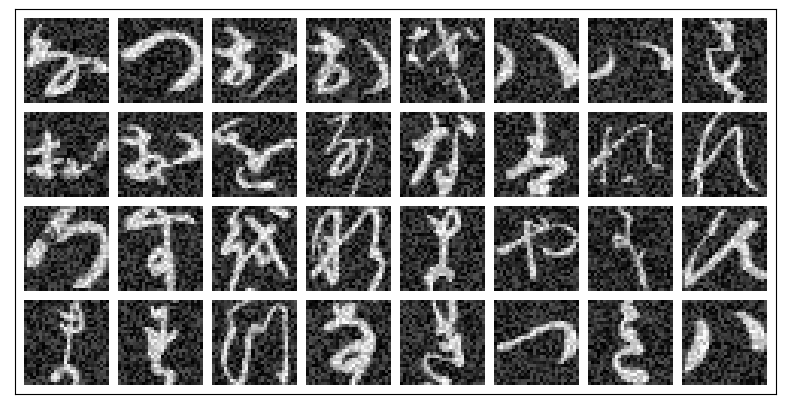

In [13]:
# Visualise a batch
batch_grid = make_grid(train_batch_samples, nrow=8, padding=3, pad_value=train_batch_samples.max())
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(batch_grid[0], cmap="gray")
ax.set(xticks=[], yticks=[])
print(train_batch_targets)